In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt   # 导入模块 matplotlib.pyplot，并简写成 plt 
import networkx as nx 
data=pd.read_csv(r"timeline.csv",header=0)
artist=pd.read_csv(r"data_by_artist.csv",header=0)

In [7]:
data.drop_duplicates(subset=['influencer_id'],keep="first",inplace=True)

In [8]:
tag=data.drop(['influencer_id','influencer_name'],axis=1)

In [9]:
v=[1 for index in range(len(tag))]
tag['num']=v
tag

,influencer_main_genre,influencer_active_start,num
0,Pop/Rock,1980,1
1,Electronic,1990,1
2,Pop/Rock,1960,1
3,Pop/Rock,1950,1
4,Pop/Rock,1980,1
...,...,...,...
85522,Pop/Rock,2010,1
85524,Pop/Rock,2010,1
85532,Electronic,2010,1
85534,Pop/Rock,2010,1


In [99]:
a=tag.groupby(['influencer_active_start','influencer_main_genre']).sum()
b=a.T
b.to_csv("timedata.csv")

In [100]:
time=a.T

In [ ]:
data=pd.read_csv(r"influence_data.csv",header=0)
id=artist['artist_id']
idlist=id.tolist()
test=data['follower_id']
test1=data['follower_main_genre']
df1 = pd.concat([test,test1],axis=1,ignore_index=False)
df1.drop_duplicates(subset=['follower_id'],keep="first",inplace=True)
df1.set_index(['follower_id'],inplace=True)
genre=df1.T
genreList=[]
for i in range(0,5854):
    if idlist[i] in test.tolist():
        genreList.append(genre[idlist[i]].tolist()[0])
    else:
         genreList.append('Unknown')

In [ ]:
artist['genre']=genreList

In [ ]:
artist.to_csv("full_artist_data.csv")

In [ ]:
tem=artist

In [ ]:
genreCharc=tem.groupby(['genre']).mean()

In [ ]:
genreCharc.to_csv("genreCharctis.csv")

In [3]:
genreCharc=pd.read_csv(r"genreCharctis.csv",header=0)
x=[]
for i in range(1,15):
    x.append(i)

genreCharc.drop(['artist_id'],axis=1,inplace=True)
usedata=genreCharc.T

In [4]:
type_time_data=pd.read_csv(r"timetype.csv",header=0)

In [5]:
type_time_data

,Year,Blues,Classical,Comedy/Spoken,Country,Easy Listening,Folk,International,Jazz,Latin,Pop/Rock,R&B;,Religious,Stage & Screen,Vocal,Avant-Garde,Reggae,Children's,Electronic,New Age
0,1930,17,3,2,14,3,6,2,45,11,1,1,3,8,39,0,0,0,0,0
1,1940,20,6,1,32,7,7,8,81,17,2,17,3,1,41,1,1,0,0,0
2,1950,35,4,5,60,7,22,9,102,29,103,104,2,13,39,1,3,2,0,0
3,1960,15,6,13,51,3,31,20,66,41,410,128,9,3,13,3,36,0,4,3
4,1970,8,2,3,60,1,12,17,45,20,419,109,11,11,14,2,38,1,10,12
5,1980,4,2,8,42,0,7,11,34,41,612,81,24,4,6,0,25,0,37,11
6,1990,2,4,9,74,1,8,10,26,54,665,114,26,5,7,2,0,1,90,6
7,2000,0,0,5,45,0,2,4,7,15,480,80,10,5,3,2,13,0,51,6
8,2010,0,1,0,25,1,0,0,0,1,116,43,1,0,0,0,0,0,16,0


In [10]:
ids=tag['influencer_main_genre'].tolist()
ids = list(set(ids))

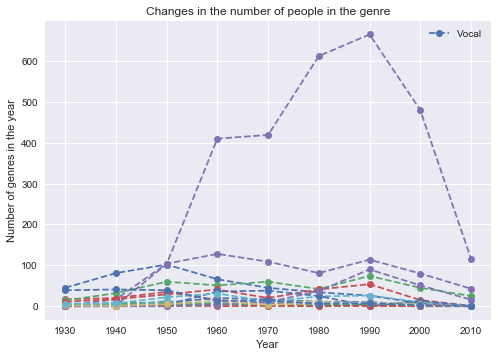

In [15]:
for i in range(0,20):
    if ids[i] != 'Unknown':
        plt.plot(type_time_data['Year'].tolist(),type_time_data[ids[i]].tolist() ,'--o') 
        plt.legend([ids[i]])
plt.style.use('seaborn')
#轴的标签
plt.xlabel('Year')
plt.ylabel('Number of genres in the year')
#轴的标题
plt.title('Changes in the number of people in the genre')
plt.show()

In [14]:
data1=pd.read_csv(r"FAC.csv",header=0)
data1

,V1,artist_name,artist_id,Zdanceability,Zenergy,Zvalence,Ztempo,Zloudness,Zmode,Zkey,...,Zduration_ms,Zpopularity,count,genre,FAC1_1,FAC2_1,FAC3_1,FAC4_1,FAC5_1,FAC6_1
0,0,Frank Sinatra,792507,-1.190115,-1.608125,-0.903049,-0.530783,-1.032300,0.466387,-0.145898,...,-0.683091,-1.027357,1369,Vocal,-1.448520,-0.036383,0.749533,-0.884217,0.023135,-0.989385
1,1,Vladimir Horowitz,119107,-1.495436,-2.159715,-1.593802,-1.327897,-3.167002,0.466387,-1.282783,...,0.241506,-2.721444,1207,Unknown,-3.540914,0.772483,0.238543,-0.516112,-0.632519,1.238073
2,2,Johnny Cash,816890,0.550895,-0.629824,0.676686,-0.277474,-0.391566,0.466387,1.275209,...,-1.004600,-0.981267,1104,Country,-0.505772,-1.267477,0.979503,-0.002294,1.301623,-0.594057
3,3,Billie Holiday,79016,0.201939,-1.777754,-0.230727,-0.544842,-0.782237,0.466387,-0.145898,...,-0.731478,-1.812219,1095,Vocal,-1.512816,-1.142238,0.906040,-0.453669,0.087797,-0.474045
4,4,Bob Dylan,66915,-0.242246,-0.497676,0.033912,0.302711,-0.293765,0.466387,0.422545,...,0.124048,-0.660267,1092,Pop/Rock,-0.429952,-0.104254,0.919211,-0.239301,0.512394,-0.131560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5849,5849,Natalie La Rose,3359519,2.105997,-0.302965,0.948008,-0.801601,0.297275,0.466387,-1.567004,...,-0.674402,1.844671,1,R&B;,0.865548,-1.559879,-1.369941,0.102734,-2.167650,-0.503426
5850,5850,Sarah Ross,3381566,1.299579,1.659521,0.403744,-1.844248,0.950920,0.466387,0.706766,...,0.196315,0.937610,1,Country,1.287065,-0.270009,0.640922,1.602201,-0.445135,-1.384528
5851,5851,Rotimi,3410250,0.678120,-0.390906,-0.569940,-0.853608,0.911204,-2.143775,-1.567004,...,-0.727539,2.373789,1,R&B;,0.704669,-0.016092,-0.769100,1.689744,-1.947205,-1.048418
5852,5852,Jillian Jacqueline,3455945,0.012271,0.400568,-1.308941,1.848365,1.180366,0.466387,1.559430,...,-0.396812,1.391140,1,Country,0.903283,0.681515,-0.651729,-1.003076,1.341925,-1.114711


In [15]:
genreList=data1['genre']
genreList=list(set(genreList))
genreList

['Unknown',
 'Jazz',
 'Easy Listening',
 'Pop/Rock',
 'International',
 'Blues',
 'Folk',
 'R&B;',
 'Avant-Garde',
 "Children's",
 'Latin',
 'Country',
 'Electronic',
 'Reggae',
 'Religious',
 'Stage & Screen',
 'Vocal',
 'Comedy/Spoken',
 'Classical',
 'New Age']

In [18]:
    artist_name=data1['artist_name'].tolist()[i]
    artist_id=ids[i]
    danceability=data1['danceability'].tolist()[i]
    energy=data1['energy'].tolist()[i]
    valence=data1['valence'].tolist()[i]
    tempo=data1['tempo'].tolist()[i]
    loudness=data1['loudness'].tolist()[i]
    mode=data1['mode'].tolist()[i]
    key=data1['key'].tolist()[i]
    acousticness=data1['acousticness'].tolist()[i]
    instrumentalness=data1['instrumentalness'].tolist()[i]
    liveness=data1['liveness'].tolist()[i]
    speechiness=data1['speechiness'].tolist()[i]
    duration_ms=data1['duration_ms'].tolist()[i]
    popularity=data1['popularity'].tolist()[i]
    genre=data1['genre'].tolist()[i]
    
    G.nodes[ids[i]]['name'] = artist_name
    G.nodes[ids[i]]['id'] = artist_id
    G.nodes[ids[i]]['danceability'] = danceability
    G.nodes[ids[i]]['energy'] = energy
    G.nodes[ids[i]]['valence'] = valence
    G.nodes[ids[i]]['tempo'] = tempo
    G.nodes[ids[i]]['loudness'] = loudness
    G.nodes[ids[i]]['mode'] = mode
    G.nodes[ids[i]]['key'] = key
    G.nodes[ids[i]]['acousticness'] = acousticness
    G.nodes[ids[i]]['instrumentalness'] = instrumentalness
    G.nodes[ids[i]]['liveness'] = liveness
    G.nodes[ids[i]]['speechiness'] = speechiness
    G.nodes[ids[i]]['duration_ms'] = duration_ms
    G.nodes[ids[i]]['popularity'] = popularity
    G.nodes[ids[i]]['genre'] = genre

KeyError: 'danceability'

In [51]:
G = nx.Graph([])
ids=data1['artist_id'].tolist()
for i in range(0,5854):
    v1=data1['FAC1_1'].tolist()[i]
    v2=data1['FAC2_1'].tolist()[i]
    v3=data1['FAC3_1'].tolist()[i]
    v4=data1['FAC4_1'].tolist()[i]
    v5=data1['FAC5_1'].tolist()[i]
    v6=data1['FAC6_1'].tolist()[i]
    g=data1['genre'].tolist()[i]
    
    G.add_node(ids[i])
    G.nodes[ids[i]]['FAC1_1'] = v1
    G.nodes[ids[i]]['FAC2_1'] = v2
    G.nodes[ids[i]]['FAC3_1'] = v3
    G.nodes[ids[i]]['FAC4_1'] = v4
    G.nodes[ids[i]]['FAC5_1'] = v5
    G.nodes[ids[i]]['FAC6_1'] = v6
    G.nodes[ids[i]]['genre'] = g
    for k in range(0,len(genreList)):
        G.nodes[ids[i]][genreList[k]] = 0
print('n:', len(G.nodes))

n: 5854


m: 1606314
Mean similarity: 0.5030311319241
Standard Deviation: 0.20926472599908072


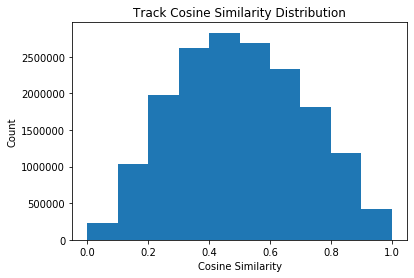

In [52]:
similarities = []
SIMILARITY_EDGE_THRESHOLD = 0.80

#features = ['danceability', 'energy', 'valence', 'tempo', 'loudness', 'mode', 'key', 'acousticness','instrumentalness','liveness','speechiness','duration_ms','popularity']
features = ['FAC1_1','FAC2_1','FAC3_1','FAC4_1','FAC5_1','FAC6_1']
#def normalization(data):
#    _range = np.max(data) - np.min(data)
#    return (data - np.min(data)) / _range

def computeSongSimilar(G, a, b):
    AB = 0
    AA = 0
    BB = 0

    for feature in features:
        featureA = G.nodes[a][feature]
        featureB = G.nodes[b][feature]

        AB += featureA * featureB
        AA += featureA ** 2
        BB += featureB ** 2

    sim = AB / (np.sqrt(AA)*np.sqrt(BB))

    return sim

def computeSongSimilarity(G, a, b):
    """
    计算两个向量之间的余弦相似度
    :param vector_a: 向量 a 
    :param vector_b: 向量 b
    :return: sim
    """
    vector_a=[]
    vector_b=[]
    va=[]
    vb=[]
    for feature in features:
        va.append(G.nodes[a][feature])
        vb.append(G.nodes[b][feature])
    vector_a=va
    vector_b=vb
    vector_a = np.mat(vector_a)
    vector_b = np.mat(vector_b)
    num = float(vector_a * vector_b.T)
    denom = np.linalg.norm(vector_a) * np.linalg.norm(vector_b)
    cos = num / denom
    sim = 0.5 + 0.5 * cos
    return sim

n = len(list(G.nodes))

for i in range(0, n):
    a = list(G.nodes)[i]
    for j in range(i+1, n):
        b = list(G.nodes)[j]
        n1=G.nodes[a]['genre']
        n2=G.nodes[b]['genre']
        similarity = computeSongSimilarity(G, a, b)
        similarities.append(similarity)

        if(similarity > SIMILARITY_EDGE_THRESHOLD):
            #if a!= b:
                #G.nodes[a][G.nodes[b]['genre']] +=1
                #G.nodes[b][G.nodes[a]['genre']] +=1
            G.add_edge(a, b)
    
print('m:', len(G.edges))
print('Mean similarity:', np.mean(similarities))
print('Standard Deviation:', np.std(similarities))

plt.hist(similarities)
plt.title('Track Cosine Similarity Distribution')
plt.xlabel('Cosine Similarity')
plt.ylabel('Count')
plt.show()

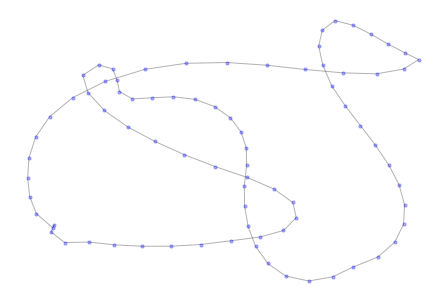

In [13]:

pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="b",alpha=0.3, node_size=10, with_labels=False)


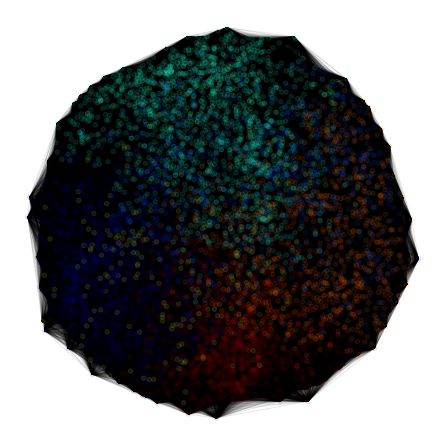

In [54]:
import community

part = community.best_partition(G)
values = [part.get(node) for node in G.nodes()]
plt.figure(3,figsize=(6,6)) 
nx.draw_spring(G, cmap = plt.get_cmap('jet'),node_color = values, node_size=20, with_labels=False)

In [ ]:
from networkx.algorithms import community
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

In [20]:
mod = community.modularity(part,G)
print("modularity:", mod)

modularity: 0.4718698638068478


In [60]:
df = pd.DataFrame(part,index=[0])
df.to_csv("type.csv")

In [61]:
artistgenre=pd.read_csv(r"full_artist_data.csv",header=0)
artistgenre.set_index(['artist_id'],inplace=True)
g=artistgenre.T
g[792507][16]

'Vocal'

In [63]:
typedf=pd.read_csv(r"type.csv",header=0)
typelist=typedf['type']
typedf.set_index(['type'],inplace=True)
typeindex=typedf.T
typelist=list(set(typelist))
result={}
def init():
    for i in range(0,len(genreList)):
        result[genreList[i]]=0
ans={}

for i in range(0,6):
    init()
    typeuse=typeindex[i].T
    ids=typeuse['id'].tolist()
    for idn in ids:
        for j in range(0,len(genreList)):
            if g[idn][16] == genreList[j]:
                result[genreList[j]] += 1
    ans[i]=result.copy()

In [65]:
df1 = pd.DataFrame(ans)
df1.to_csv("type_artist_num.csv")

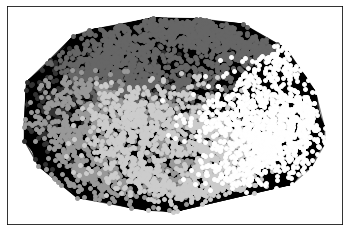

In [10]:
partition = community.best_partition(G)
#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 15,
                                node_color = str(count / size))


nx.draw_networkx_edges(G,pos, alpha=0.5)
plt.show()

In [25]:
ans={}
result={}
e=[]
def init():
    for i in range(0,len(genreList)):
        result[genreList[i]]=0
        
for i in range(0,20): 
    init()
    e=[]
    for j in range(0,n):
        r=0
        a = list(G.nodes)[j]
        if G.nodes[a]['genre'] == genreList[i]:
            for k in range(0,20):
                result[genreList[k]] += G.nodes[a][genreList[k]]
                #r=r+G.nodes[a][genreList[k]]
            #e.append(r)
    #ans[genreList[i]]=e
    ans[genreList[i]]=result.copy()
    

In [26]:
ans

{'International': {'International': 980,
  'Unknown': 11744,
  'Easy Listening': 227,
  'Blues': 1488,
  'R&B;': 8461,
  'Avant-Garde': 174,
  'Stage & Screen': 558,
  'Jazz': 5643,
  'Country': 5478,
  'Latin': 2127,
  'Pop/Rock': 26552,
  'New Age': 511,
  'Religious': 799,
  'Reggae': 1731,
  'Classical': 245,
  "Children's": 78,
  'Electronic': 1905,
  'Comedy/Spoken': 345,
  'Folk': 1436,
  'Vocal': 2256},
 'Unknown': {'International': 11744,
  'Unknown': 142706,
  'Easy Listening': 3219,
  'Blues': 17810,
  'R&B;': 99986,
  'Avant-Garde': 1650,
  'Stage & Screen': 6109,
  'Jazz': 64571,
  'Country': 68541,
  'Latin': 25492,
  'Pop/Rock': 368292,
  'New Age': 5541,
  'Religious': 10621,
  'Reggae': 20130,
  'Classical': 2735,
  "Children's": 827,
  'Electronic': 23657,
  'Comedy/Spoken': 4626,
  'Folk': 16936,
  'Vocal': 26780},
 'Easy Listening': {'International': 227,
  'Unknown': 3219,
  'Easy Listening': 112,
  'Blues': 387,
  'R&B;': 1207,
  'Avant-Garde': 61,
  'Stage & Scre

In [27]:
#ans1=ans
data2=pd.read_csv(r"FAC.csv",header=0)
tem=data2
tem.set_index(['genre'],inplace=True)
tem2=tem.T
ans1={}
init()
for i in range(0,len(genreList)):
    v=tem2[genreList[i]].T
    num=v.shape[0]
    #print(num)
    init()
    for j in range(0,len(genreList)):
        result[genreList[j]] = ans[genreList[i]][genreList[j]]/num
    ans1[genreList[i]]=result.copy()

In [28]:
ans1

{'International': {'International': 15.3125,
  'Unknown': 183.5,
  'Easy Listening': 3.546875,
  'Blues': 23.25,
  'R&B;': 132.203125,
  'Avant-Garde': 2.71875,
  'Stage & Screen': 8.71875,
  'Jazz': 88.171875,
  'Country': 85.59375,
  'Latin': 33.234375,
  'Pop/Rock': 414.875,
  'New Age': 7.984375,
  'Religious': 12.484375,
  'Reggae': 27.046875,
  'Classical': 3.828125,
  "Children's": 1.21875,
  'Electronic': 29.765625,
  'Comedy/Spoken': 5.390625,
  'Folk': 22.4375,
  'Vocal': 35.25},
 'Unknown': {'International': 14.463054187192117,
  'Unknown': 175.7463054187192,
  'Easy Listening': 3.9642857142857144,
  'Blues': 21.93349753694581,
  'R&B;': 123.13546798029557,
  'Avant-Garde': 2.0320197044334973,
  'Stage & Screen': 7.523399014778325,
  'Jazz': 79.52093596059113,
  'Country': 84.41009852216749,
  'Latin': 31.39408866995074,
  'Pop/Rock': 453.5615763546798,
  'New Age': 6.823891625615763,
  'Religious': 13.080049261083744,
  'Reggae': 24.79064039408867,
  'Classical': 3.36822660

In [31]:
df = pd.DataFrame(ans1)

In [32]:
df

,International,Unknown,Easy Listening,Blues,R&B;,Avant-Garde,Stage & Screen,Jazz,Country,Latin,Pop/Rock,New Age,Religious,Reggae,Classical,Children's,Electronic,Comedy/Spoken,Folk,Vocal
International,15.312500,14.463054,14.1875,16.909091,14.172529,19.333333,14.684211,16.031250,14.492063,14.469388,9.896385,14.194444,10.376623,15.184211,15.3125,19.50,10.467033,9.324324,18.177215,18.048
Unknown,183.500000,175.746305,201.1875,202.386364,167.480737,183.333333,160.763158,183.440341,181.325397,173.414966,137.268729,153.916667,137.935065,176.578947,170.9375,206.75,129.983516,125.027027,214.379747,214.240
Easy Listening,3.546875,3.964286,7.0000,4.397727,2.021776,6.777778,7.526316,6.818182,3.208995,2.401361,1.965337,7.416667,2.415584,1.526316,8.2500,3.25,1.873626,2.270270,7.037975,6.592
Blues,23.250000,21.933498,24.1875,29.431818,19.385260,17.444444,10.631579,20.656250,24.571429,20.653061,13.679091,11.111111,11.831169,20.429825,13.5000,35.00,9.736264,14.405405,30.113924,27.912
R&B;,132.203125,123.135468,75.4375,131.511364,185.487437,68.888889,50.263158,88.471591,125.193122,174.034014,106.747298,47.555556,106.688312,221.456140,48.1250,132.50,141.280220,77.594595,95.443038,95.192
Avant-Garde,2.718750,2.032020,3.8125,1.784091,1.038526,4.000000,5.394737,4.508523,1.232804,1.074830,1.026090,5.638889,1.558442,0.587719,5.8750,2.00,1.868132,0.567568,3.506329,3.672
Stage & Screen,8.718750,7.523399,17.8750,4.590909,3.199330,22.777778,26.789474,13.781250,4.224868,4.156463,5.321282,25.083333,10.103896,1.043860,26.7500,4.25,6.505495,3.000000,13.202532,15.208
Jazz,88.171875,79.520936,150.0000,82.625000,52.164154,176.333333,127.657895,184.392045,41.410053,55.632653,36.320164,185.138889,42.025974,49.745614,167.5625,47.50,78.021978,36.621622,99.164557,85.984
Country,85.593750,84.410099,75.8125,105.545455,79.268007,51.777778,42.026316,44.468750,135.825397,93.721088,81.909430,25.833333,68.441558,61.798246,43.6250,124.50,34.291209,34.783784,113.936709,108.144
Latin,33.234375,31.394089,22.0625,34.500000,42.852596,17.555556,16.078947,23.232955,36.447090,44.027211,28.143123,13.638889,25.584416,50.850877,14.8750,33.00,29.631868,13.405405,26.506329,26.568


In [33]:
df.to_csv('heatmap.csv')

In [2]:
heat=pd.read_csv(r"heatmap_fix.csv",header=0)
genre=heat['Unnamed: 0'].tolist()
heat.set_index(['Unnamed: 0'],inplace=True)
usedf=heat.T

In [3]:
def normalization(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range

In [4]:
for ge in genre:
    da=usedf[ge].tolist()
    newda=normalization(da)
    usedf[ge]=newda

In [5]:
n=np.array(usedf)

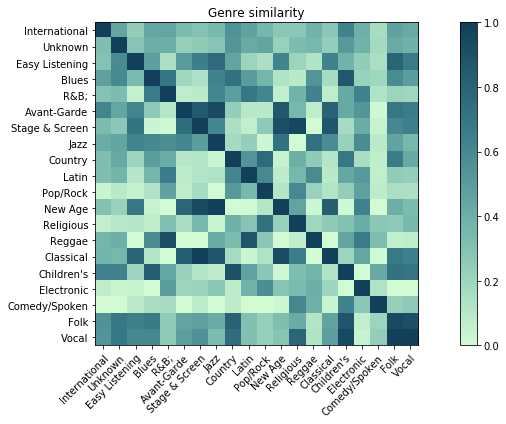

In [8]:

from palettable.cartocolors.sequential import DarkMint_4
# 这里是创建一个数据
vegetables = genre
farmers = genre

harvest = n

# 这里是创建一个画布
fig, ax = plt.subplots(figsize=(12,6))
im = ax.imshow(harvest,cmap=DarkMint_4.mpl_colormap)

# 这里是修改标签
# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# 因为x轴的标签太长了，需要旋转一下，更加好看
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# 添加每个热力块的具体数值
# Loop over data dimensions and create text annotations.
#for i in range(len(vegetables)):
#    for j in range(len(farmers)):
#        text = ax.text(j, i, harvest[i, j],
#                       ha="center", va="center", color="w")
ax.set_title("Genre similarity")
fig.tight_layout()
plt.colorbar(im)
plt.show()

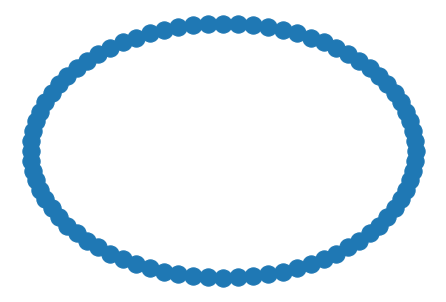

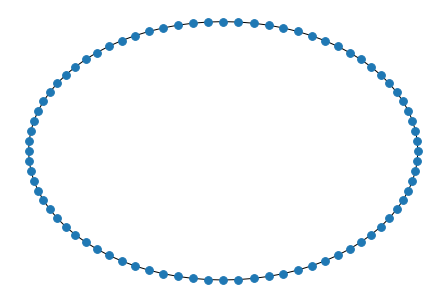

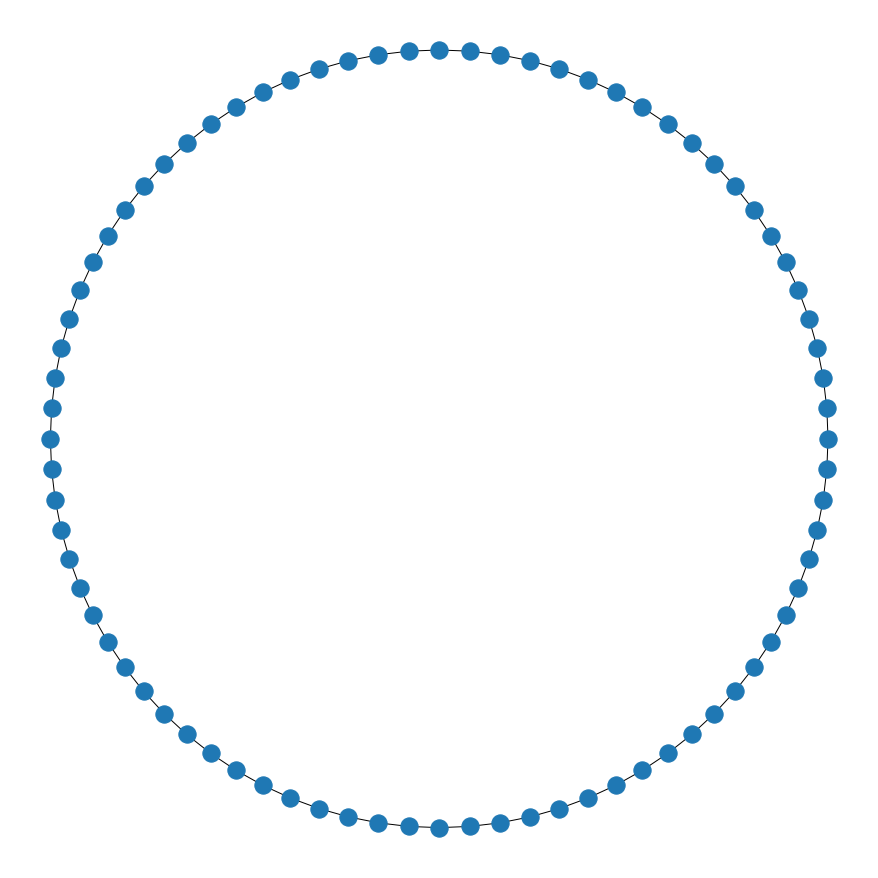

In [11]:
import matplotlib.pyplot as plt
import networkx as nx
G = nx.cycle_graph(80)
pos = nx.circular_layout(G)
# default
plt.figure(1)
nx.draw(G,pos)
# smaller nodes and fonts
plt.figure(2)
nx.draw(G,pos,node_size=60,font_size=8) 
# larger figure size
plt.figure(3,figsize=(12,12)) 
nx.draw(G,pos)
plt.show()